In [1]:
import numpy as np
import pandas as pd
import os
import sklearn 

In [2]:
os.chdir('/Users/mayurbansal/documents/github/Dotin-Columbia-Castone-Team-Alpha-/data/Clean Data')

In [3]:
#read data
data=pd.read_csv("../Clean Data/merged_data_user_level_V2.csv",index_col=0)

In [4]:
data.head()

,user_id,scroll count,mouse movement count,click count,average_click_delay,User Record Count,Total Time,Total Distance,validation,Min Score Value.x,...,perc_left_movement,perc_right_movement,perc_no_movement_x,movesup,movesdown,no_vertical_movement,perc_upwward_movement,perc_downward_movement,perc_no_movement_y,system
1,365,11,4766,227,1.301838,5005,245.808,5005,False,1,...,28.517186,26.618705,44.864109,1512,2620,872,30.215827,52.358114,17.426059,pc
2,371,1,3900,143,0.886830,4044,185.388,4044,True,1,...,41.578036,38.511007,19.910957,1327,1950,766,32.822162,48.231511,18.946327,pc
3,373,35,5692,225,0.904714,5952,200.144,5952,False,1,...,39.438750,36.548479,24.012771,1719,2539,1693,28.885902,42.665098,28.449000,pc
4,374,32,4666,277,7.335211,4975,249.975,4975,True,3,...,36.771210,31.081624,32.147165,1626,2169,1179,32.689988,43.606755,23.703257,pc
5,375,70,3758,77,3.378696,3905,577.872,3905,False,1,...,37.064549,37.371926,25.563525,1718,1476,710,44.006148,37.807377,18.186475,pc


In [5]:
#fill na values with 0
data['perc_left_movement'].fillna(0,inplace=True)
data['perc_right_movement'].fillna(0,inplace=True)
data['perc_no_movement_x'].fillna(0,inplace=True)
data['average_click_delay'].fillna(0,inplace=True)

### have 2 na values in each of these columns, replacing these with 0 for now

In [6]:
#logistic regression
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 49 columns):
user_id                   730 non-null int64
scroll count              730 non-null int64
mouse movement count      730 non-null int64
click count               730 non-null int64
average_click_delay       730 non-null float64
User Record Count         730 non-null int64
Total Time                730 non-null float64
Total Distance            730 non-null int64
validation                730 non-null bool
Min Score Value.x         730 non-null int64
Max Score Value           730 non-null int64
Min Score Value.y         730 non-null int64
bf _votes_ 1              730 non-null int64
bf _votes_ 5              730 non-null int64
bf _votes_ 3              730 non-null int64
bs _votes_ 3              730 non-null int64
miq _votes_ 3             730 non-null int64
pgi _votes_ 4             730 non-null int64
bs _votes_ 1              730 non-null int64
bs _votes_ 4              730 non-nul

In [8]:
# Split data into 'X' features and 'y' target label sets
y = data['validation']
X=data.iloc[:,np.r_[1:7,12:33,36:47]]

### for our first model we have chosen the following variables:

### -scroll count, movement count, click count, total record count
### -max time elapsed, total distance
### -bf_votes_1 etc i.e. choice of answers for each category for each question 
### -movement directions of user i.e. counts of left,right,up,down movements and percentage of each of these movements

## 70,30 split for the model

In [9]:

# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression
# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()
# Fit the model using the training data
#X_train -> parameter supplies the data features
#y_train -> parameter supplies the target labels
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred = logmodel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


             precision    recall  f1-score   support

      False       0.67      0.49      0.56        70
       True       0.79      0.89      0.83       149

avg / total       0.75      0.76      0.75       219



### Accuracy and other metrics are close to 75% for the first model using some features we created

In [13]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(logmodel, n_features_to_select= 10)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False False False  True False False  True  True False False False False
  True  True  True  True  True False False  True False False False False
 False False  True False False False False False False False False False
 False False]
[25 26 21  1 24 16  1  1  6  4 28 17  1  1  1  1  1  2  8  1 18 14 11 12
  9  3  1 29 20 23  7 10  5 19 27 22 15 13]


Index(['average_click_delay', 'bf _votes_ 1', 'bf _votes_ 5', 'bs _votes_ 1',
       'bs _votes_ 4', 'bs _votes_ 5', 'miq _votes_ 1', 'miq _votes_ 2',
       'pgi _votes_ 1', 'bs _votes_ 2'],
      dtype='object')

[0.0260597  0.02607544 0.02550287 0.02382424 0.02621443 0.04768998
 0.03325435 0.03104577 0.0283353  0.0194223  0.02159497 0.02757941
 0.0059438  0.01908737 0.02090604 0.0210153  0.0395221  0.02207135
 0.01935103 0.03776358 0.02900228 0.0142124  0.02347119 0.02435805
 0.02947334 0.03426764 0.02046416 0.03319464 0.02540512 0.02031744
 0.02638035 0.02674456 0.03131246 0.03273967 0.02872038 0.0250238
 0.02870974 0.02394346]


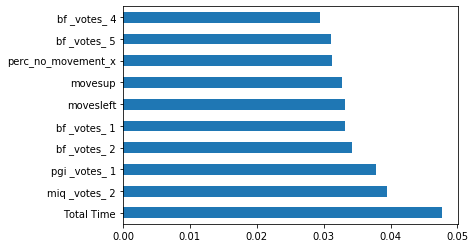

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Using tree based classifier method for feature selection, we find following features as important:

### - How users answer some questions
### - movements right,left, down etc
### -no of records(scroll+click+moves) by user
### -total time taken by user to complete survey